# Introduction

- Dans ce notebook nous allons fit une fonction grâce à un réseau de neuronne

![Description de l'image](.\images\IAImage1.webp)


## Importations

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
from IPython.display import HTML


## Fonction qu'il faut approximer

In [77]:
def complex_function(x):
    return np.sin( 3 * x) * (x/3 -5 )  +  np.cos(0.1 *  x) * 2 * x  - np.cos( 0.02* x) * 1/8 * x  + 5 - np.cos( 0.3* x) * 2 * x

## Creations des points de la fonction

In [78]:
# Generation of X, Y and xTest
xData = np.linspace(-np.pi, np.pi, 5000)
yData = complex_function(xData)
xTest = np.linspace(-np.pi, np.pi, 500)


## Standardisation

In [103]:
Xmean = np.mean(xData)
Xstd = np.std(xData)
Ymean = np.mean(xData)
Ystd = np.std(xData)
xData = (xData - Xmean) / Xstd
yData = (yData - Ymean) / Ystd


## Creation du model 

In [114]:
# Creation
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(50, activation='tanh'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 50)                100       
                                                                 
 dense_54 (Dense)            (None, 50)                2550      
                                                                 
 dense_55 (Dense)            (None, 50)                2550      
                                                                 
 dense_56 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5251 (20.51 KB)
Trainable params: 5251 (20.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Creations des callbacks

In [115]:

# Callback for prediction history
class PredictionHistory(tf.keras.callbacks.Callback):
    def __init__(self):
        self.predictions_per_epoch = []

    def on_epoch_end(self, epoch, logs=None):
        self.predictions_per_epoch.append(model.predict(xTest).flatten())

# Callback for weight history
class WeightsHistory(tf.keras.callbacks.Callback):
    def __init__(self):
        self.weightsPerEpoch = []

    def on_epoch_end(self, epoch, logs=None):
        weights = [layer.get_weights()[0] for layer in model.layers]
        self.weightsPerEpoch.append(weights)

# call back creation
prediction_history = PredictionHistory()
weights_history = WeightsHistory()

## Fit du model

In [116]:
history = model.fit(xData, yData, epochs=50, callbacks=[prediction_history, weights_history])


Epoch 1/50
157/157 [==============================] - 1s 2ms/step - loss: 4.3885
Epoch 2/50
157/157 [==============================] - 0s 2ms/step - loss: 3.0289
Epoch 3/50
157/157 [==============================] - 0s 2ms/step - loss: 2.7112
Epoch 4/50
157/157 [==============================] - 0s 2ms/step - loss: 2.2666
Epoch 5/50
157/157 [==============================] - 0s 2ms/step - loss: 1.6392
Epoch 6/50
157/157 [==============================] - 0s 2ms/step - loss: 1.1263
Epoch 7/50
157/157 [==============================] - 0s 1ms/step - loss: 0.8279
Epoch 8/50
157/157 [==============================] - 0s 1ms/step - loss: 0.7075
Epoch 9/50
157/157 [==============================] - 0s 2ms/step - loss: 0.6464
Epoch 10/50
157/157 [==============================] - 0s 2ms/step - loss: 0.5945
Epoch 11/50
157/157 [==============================] - 0s 2ms/step - loss: 0.5550
Epoch 12/50
157/157 [==============================] - 0s 2ms/step - loss: 0.5377
Epoch 13/50
157/157 [====

## Animation du fit

In [117]:
%matplotlib notebook
def update_plot(i, x, y, line):
    line.set_data(x, prediction_history.predictions_per_epoch[i])
    return line,

fig, ax = plt.subplots()
x, y = xTest, prediction_history.predictions_per_epoch[0]
line, = ax.plot(x, y, 'r-')
ax.plot(xData, yData, 'b-', label='Fonction originale')
plt.legend()

# Créer l'animation des prédictions
ani = FuncAnimation(fig, update_plot, frames=len(prediction_history.predictions_per_epoch),
                    fargs=(x, y, line), blit=True)


ani.save('animation.gif', writer='pillow', fps=15)
HTML(ani.to_jshtml())



<IPython.core.display.Javascript object>

## Affichage de la loss

<IPython.core.display.Javascript object>

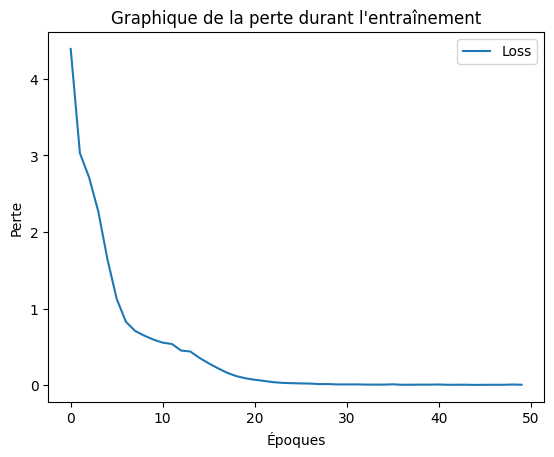

AttributeError: 'NoneType' object has no attribute 'remove_callback'

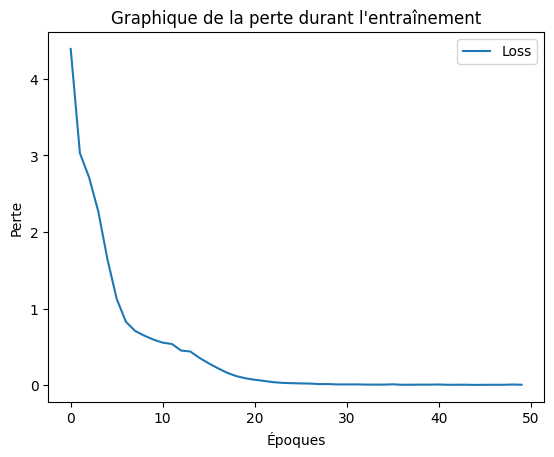

In [118]:
%matplotlib inline
plt.figure()
plt.plot(history.history['loss'], label='Loss')
plt.title('Graphique de la perte durant l\'entraînement')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()


## affichage de la premiere couche du réseau de neuronne

In [119]:
%matplotlib notebook
def update_heatmap(epoch, data, ax):
    ax.clear()
    #FIRST LAYER
    layer_weights = data[epoch][0]  
    ax.imshow(layer_weights, cmap='hot', aspect='auto')
    ax.set_title(f'Epoch: {epoch + 1}')



# Créer la figure pour l'animation de heatmap
fig, ax = plt.subplots()
ani = FuncAnimation(fig, update_heatmap, frames=50,
                    fargs=(weights_history.weightsPerEpoch, ax))


ani.save('animation1.gif', writer='pillow', fps=15)
HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>

## affichage de la deuxieme couche du réseau de neuronne

In [120]:
%matplotlib notebook
def update_heatmap(epoch, data, ax):
    ax.clear()
    #SECOND LAYER
    layer_weights = data[epoch][2]  
    ax.imshow(layer_weights, cmap='hot', aspect='auto')
    ax.set_title(f'Epoch: {epoch + 1}')


# Créer la figure pour l'animation de heatmap
fig, ax = plt.subplots()
ani = FuncAnimation(fig, update_heatmap, frames=50,
                    fargs=(weights_history.weightsPerEpoch, ax))


ani.save('animation2.gif', writer='pillow', fps=15)
HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>